Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=3d55ad34c5cfb5e0cd76a0b1b168ff8c549930a780bfe1001c28bdeb530437b8
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 5400 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/18 [00:00<?, ?it/s]

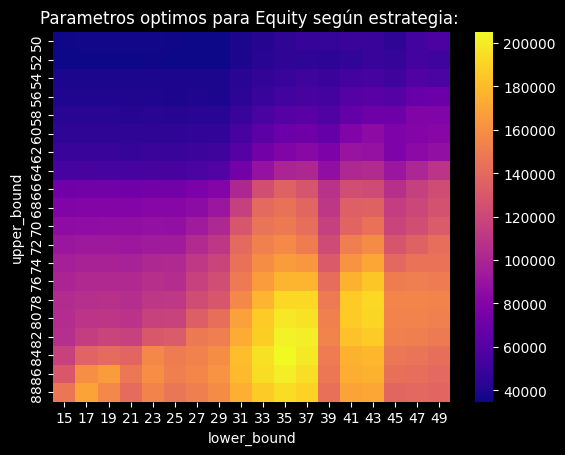

    Size  EntryBar  ExitBar  EntryPrice   ExitPrice           PnL  ReturnPct  \
0    557        16       19  179.418118  178.830002   -327.580458  -0.003278   
1    556        19       22  179.187662  174.949997  -2356.141677  -0.023649   
2    555        22      146  175.299897  192.559998   9579.355842   0.098460   
3    554       146      151  192.945118  191.460007   -822.751405  -0.007697   
4    552       151      197  191.842927  188.419998  -1889.456564  -0.017842   
5    551       197      241  188.796838  198.580002   5390.523180   0.051818   
6    550       241      375  198.977162  207.259995   4555.557970   0.041627   
7    549       375      412  207.674514  201.729996  -3263.540804  -0.028624   
8    548       412      413  202.133456  183.573001 -10171.129132  -0.091823   
9    533       438      508  188.646544  195.190002   3487.663199   0.034686   
10   532       508      514  195.580382  189.960007  -2990.039890  -0.028737   
11   531       514      532  190.339927 

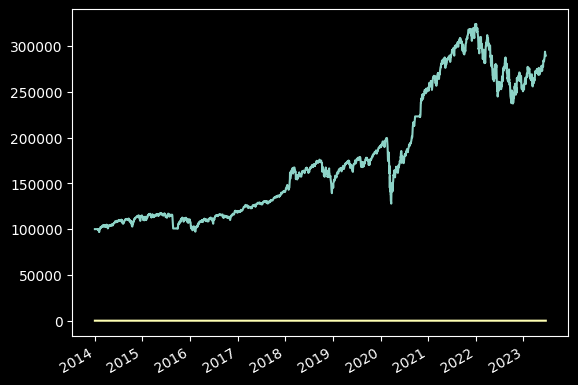

In [4]:
!pip install backtesting
!pip install pandas_ta

from backtesting import Strategy, Backtest
from backtesting.lib import crossover
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

data = yf.download('SPY', '2020-01-01')

class Rsi(Strategy):
  upper_bound = 70
  lower_bound = 30
  rsi_window = 14

  def init(self):
    self.rsi = self.I(ta.rsi, pd.Series(self.data.Close), self.rsi_window)

  def next(self):
    if crossover(self.rsi, self.upper_bound):
      self.position.close()
      self.sell(tp=0.9*self.data.Close, sl=1.10*self.data.Close)
    elif crossover(self.lower_bound, self.rsi):
      self.position.close()
      self.buy(tp=1.5*self.data.Close, sl=0.9*self.data.Close)

bt = Backtest(data, Rsi, cash=100000, commission=0.002)
bt.run()
bt.plot()

bt.run()['_trades']
bt.run()['_equity_curve']

def optim_func(series):
    return series['Equity Final [$]']/series['Exposure Time [%]']

stats, heatmap = bt.optimize(
        upper_bound = range(50,90,2),
        lower_bound = range(15,50,2),
        rsi_window = range(10,40,2),
        maximize='Equity Final [$]',
        return_heatmap=True)

heatmap.unstack()

print(stats['_strategy'].upper_bound)
print(stats['_strategy'].lower_bound)
print(stats['_strategy'].rsi_window)

plt.style.use('dark_background')
sns.heatmap(heatmap.groupby(['upper_bound', 'lower_bound']).mean().unstack(), cmap='plasma')
plt.title('Parametros optimos para Equity según estrategia: ')
plt.show()

print(stats['_trades'])
stats['_equity_curve']['Equity'].plot()
(-1*stats['_equity_curve']['DrawdownPct']).plot()
plt.show()



In [6]:
print(stats['_strategy'].upper_bound)
print(stats['_strategy'].lower_bound)
print(stats['_strategy'].rsi_window)


84
33
12
